# Taller 5 Regresion Logística

## Objetivo

En el presente taller tiene como objetivo implementar en python el metodo estadístico multivariado denominado Regresión Logística

## Actividades a realizar

El método de Regresión Logística se implementará con datos de la cuenca La Arenosa en el municipio de San Carlos. Se utilizarán como variables predictoras la pendiente, la curvatura, aspecto, el flujo acumulado, coberturas, y como variable dependiente el invetario de movimientos en masa. Estas variables han sido seleccionadas sólo por facilidad del presente ejercicio, y no corresponden a un análisis de las variables con mejor capacidad predictora.

Este ejercicio incluye todas las fases de un un mapa de susceptibilidad, desde importar las variables, analisis exploratorio de datos, construcción del modelo y evaluación del desempeño y capacidad de predicción.

Se utilizará en Python dos librerias de funciones: el statsmodels para obtener la tabla de resultados y el sklearn para construir el modelo. 



## Python

A continuacion se detalla el procedimiento en Python

Importar las librerias necesarias

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,auc

Importar las variables

In [2]:
driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/slope_rad')
pendiente = file.GetRasterBand(1)
pendiente = pendiente.ReadAsArray()
pendiente=np.where(pendiente==-3.4028234663852886e+38,np.nan,pendiente)
pendiente=pendiente*180/np.pi
pendiente_vector=pendiente.ravel()
pendiente_vector2=np.nan_to_num(pendiente_vector)
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos inf

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/curvatura')
curvatura=raster.GetRasterBand(1)
curvatura=curvatura.ReadAsArray()
curvatura=np.where(curvatura==-3.4028234663852886e+38,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector2=np.nan_to_num(curvatura_vector)
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/aspecto')
aspecto=raster.GetRasterBand(1)
aspecto=aspecto.ReadAsArray()
aspecto=np.where(aspecto==-3.4028234663852886e+38,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector2=np.nan_to_num(aspecto_vector)
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/flowacum_m2')
flujo=raster.GetRasterBand(1)
flujo=flujo.ReadAsArray()
flujo=np.where(flujo==-3.4028234663852886e+38,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector2=np.nan_to_num(flujo_vector)
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/Coberturas_Arenosa.tif')
band = file.GetRasterBand(1)
coberturas = band.ReadAsArray()
coberturas=np.where(coberturas==2147483647,np.nan,coberturas)
coberturas_vector=coberturas.ravel()
coberturas_vector2=np.nan_to_num(coberturas_vector)
coberturas_vector_MenM=coberturas_vector[~np.isnan(coberturas_vector)]

cob=np.ndarray.tolist(coberturas_vector_MenM)
for i in range(174):
    a=np.random.randint(2,4)
    cob.append(a)
    
coberturas_vector_MenM=np.asarray(cob)

np.unique(coberturas)

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/inventario.tif')
inventario=raster.GetRasterBand(1)
inventario=inventario.ReadAsArray()
msk=np.where(pendiente>=0,1,np.nan)
inventario=msk*inventario
inventario=np.where(inventario==1,0,inventario)
inventario=np.where(inventario==2,1,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]

In [ ]:
#Para Google colab
from google.colab import drive
drive.mount('/content/drive')

Construir la tabla de variables independientes y dependiente

In [43]:
#Dataframe con las variables filtradas 
d={'inventario':inventario_vector_MenM,'cobertura':coberturas_vector_MenM,'pendiente':pendiente_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM}
x = pd.DataFrame(d)
print(list(x.columns))
y=x['inventario']
resumen=x.describe().T
print(resumen)

['inventario', 'cobertura', 'pendiente', 'flujo_acum', 'aspecto', 'curvatura']
              count          mean            std        min        25%  \
inventario  99060.0      0.026560       0.160793   0.000000   0.000000   
cobertura   99060.0      2.425863       1.155216   1.000000   2.000000   
pendiente   99060.0     28.132240      10.509834   0.086598  21.137832   
flujo_acum  99060.0  23187.123047  257582.718750   0.000000   0.000000   
aspecto     99060.0    186.726166     121.806618   0.000000  67.163525   
curvatura   99060.0      0.000000       5.812411 -41.000000  -2.744537   

                   50%         75%           max  
inventario    0.000000    0.000000  1.000000e+00  
cobertura     2.000000    2.000000  5.000000e+00  
pendiente    29.295362   35.876204  6.165246e+01  
flujo_acum  200.000000  600.000000  9.865900e+06  
aspecto     191.743095  306.869904  3.599956e+02  
curvatura     0.349487    3.226929  3.385083e+01  


Análisis exploratorio de datos

C:\Users\Edier\Anaconda3\envs\edier\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Edier\Anaconda3\envs\edier\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Edier\Anaconda3\envs\edier\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


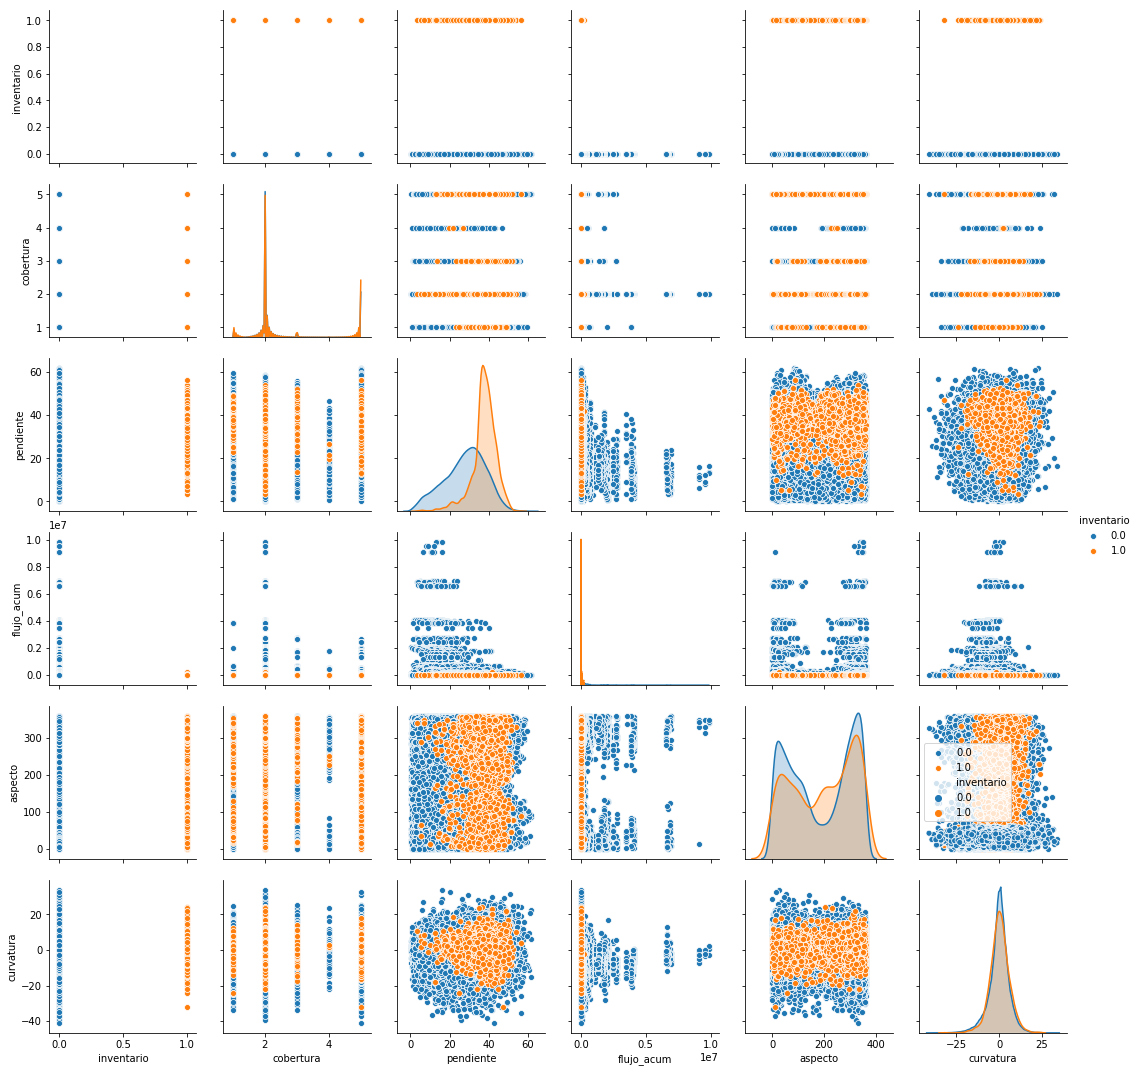

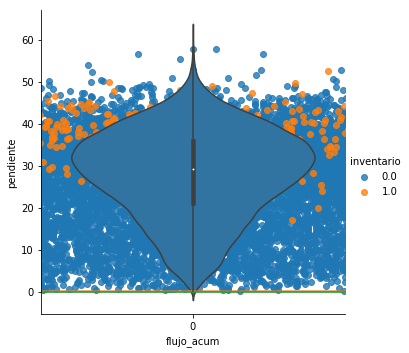

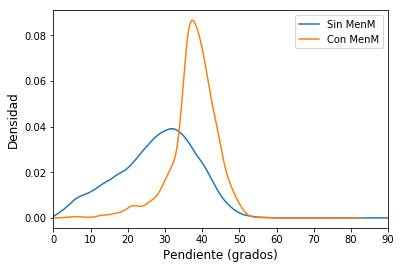

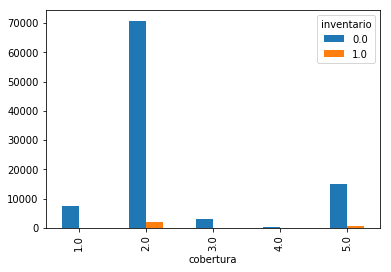

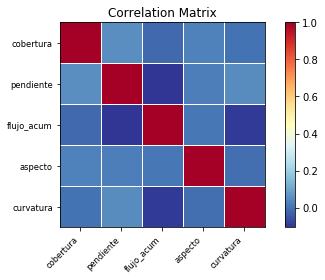

In [ ]:
#numero de 0 y 1 d la variable dependiente
x['inventario'].value_counts()

#Matriz de scattering utilizando seaborn
sns.pairplot(x, hue='inventario')
sns.scatterplot(x="curvatura", y="pendiente", hue="inventario", data=x)
sns.lmplot('curvatura', 'pendiente', data=x, hue='inventario', fit_reg=False);

#Histogramas
sns.distplot(x['pendiente']);
sns.distplot(x['curvatura']);
sns.distplot(x['flujo_acum']);

sns.violinplot(data=x['pendiente']);

#Histograma de frecuencia para CON y SIN MenM
x_sin=x[(x['inventario']==0)]
x_con=x[(x['inventario']==1)]

fig, ax = plt.subplots()
x_sin['pendiente'].plot.kde(ax=ax, label='Sin MenM')
x_con['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (grados)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

#Media de cada variabel separada por sin MeM y con MenM
x.groupby('inventario').mean()

#figura de barras cruzada de geologia de acuerdo con la variabel dependiente
pd.crosstab(x.cobertura,x.inventario).plot(kind='bar')

#Matriz de correlacion de Pearson y mapa de calor
MatCorre=DataFrame(x.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;


In [4]:
x.drop('inventario', axis=1, inplace=True)
dummy_coberturas=pd.get_dummies(x['cobertura'],prefix='cob')
column_name=x.columns.values.tolist()
column_name.remove('cobertura')
x1=x[column_name].join(dummy_coberturas)
x1.head()

,pendiente,flujo_acum,aspecto,curvatura,cob_1.0,cob_2.0,cob_3.0,cob_4.0,cob_5.0
0,3.194784,0.0,80.800842,0.909546,0,1,0,0,0
1,4.556033,100.0,80.072861,-1.191040,0,1,0,0,0
2,15.029085,0.0,114.904884,5.199097,0,1,0,0,0
3,10.056046,0.0,101.990807,-1.439331,0,1,0,0,0
4,7.235751,0.0,30.782837,-2.977417,0,1,0,0,0


Las variables categóricas deben ser transformadas a variables binarias. Para el presente ejercicio se debe realizar para coberturas

In [5]:
#Dataframe de las variables de todo el mapa
f={'cobertura': coberturas_vector2,'pendiente':pendiente_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
dummy_coberturas=pd.get_dummies(x_map['cobertura'],prefix='cob')
column_name=x_map.columns.values.tolist()
column_name.remove('cobertura')
x_map=x_map[column_name].join(dummy_coberturas)
x_map=x_map.drop('cob_0.0',axis=1)

In [9]:
x_map

,pendiente,flujo_acum,aspecto,curvatura,cob_1.0,cob_2.0,cob_3.0,cob_4.0,cob_5.0
0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
198355,0.0,0.0,0.0,0.0,0,0,0,0,0
198356,0.0,0.0,0.0,0.0,0,0,0,0,0
198357,0.0,0.0,0.0,0.0,0,0,0,0,0
198358,0.0,0.0,0.0,0.0,0,0,0,0,0


In [10]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99055    0.0
99056    0.0
99057    0.0
99058    0.0
99059    0.0
Name: inventario, Length: 99060, dtype: float64

Tabla de resultados con statsmodels

In [11]:
import statsmodels.api as sm

model=sm.Logit(y,x1)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108361
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:                99060
Model:                          Logit   Df Residuals:                    99051
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.1159
Time:                        11:23:08   Log-Likelihood:                -10734.
converged:                       True   LL-Null:                       -12142.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pendiente      0.1138      0.003     44.300      0.000       0.109       0.119
flujo_acum -5.411e-05   1.11

Entrenar el modelo y aplicarlo para toda la cuenca

In [ ]:
model.fit(y, x1)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(zip(x1.columns,np.transpose(model.coef_)))

map_predic=model.predict(x_map)

#Evaluacion general del modelo
model.score(x1,y)

Para seleccionar las variables automáticamente utilizando sklearn

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [15]:
rfe=RFE(model,5)
rfe=rfe.fit(x1,y)
print(rfe.support_)
print(rfe.ranking_)
print(rfe.coef_)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True False False False  True  True False  True  True]
[1 5 4 3 1 1 2 1 1]


AttributeError: 'RFE' object has no attribute 'coef_'

In [8]:
result=model.fit(x1,y)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [9]:
print(result.coef_)

[[ 1.3015136e-01 -3.4541645e-05  3.3320786e-04  3.4758842e-03
  -1.4443126e+00 -8.7646002e-01 -4.5342430e-01  3.3345062e-02
  -7.4983555e-01]]


In [11]:
y_pred=result.predict(x1)
y_prob=result.predict_proba(x1)

In [18]:
y_prob

array([[0.96502946, 0.03497054],
       [0.9614443 , 0.0385557 ],
       [0.87370534, 0.12629466],
       ...,
       [0.705173  , 0.294827  ],
       [0.91122379, 0.08877621],
       [0.91885374, 0.08114626]])

In [12]:
confusion_matrix(y, y_pred)

array([[65056, 31373],
       [  451,  2180]], dtype=int64)

Para validar el modelo se debe separar la tabla con las variables entre celdas de entrenamiento y celdas de verificación

In [13]:
#Para utilizar validacion cruzada con el 80/20%
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x1, y, test_size=0.2, random_state=7)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_validation.shape)
print('Tamaño de labels de validación:', y_validation.shape)

Tamaño de variables de entrenamiento: (79248, 9)
Tamaño de labels de entrenamiento: (79248,)
Tamaño de variables de validación: (19812, 9)
Tamaño de labels de validación: (19812,)


In [15]:
#Se crea el modelo de regresion logistica utilizando solo la base de datso de entrenamiento (80%) generada
result=model.fit(x_train,y_train)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [27]:
#las probabilidades para los datos de entrenamiento (80%) (desempeño)
y_train_pred=result.predict(x_train)
y_train_probs=result.predict_proba(x_train)[:,1]

In [38]:
#Las probabilidades entonces para las celdas de validacion (20%) (predicción)
y_val_pred=result.predict(x_validation) #utiliza por defecto el valro de 0,5, por enciam es uno y por debajo es 0
y_val_probs=result.predict_proba(x_validation)[:,1]

In [28]:
#matriz de confusion para desempeño
confusion_matrix(y_train, y_train_pred)

array([[52237, 24930],
       [  368,  1713]], dtype=int64)

In [29]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81     77167
         1.0       0.06      0.82      0.12      2081

    accuracy                           0.68     79248
   macro avg       0.53      0.75      0.46     79248
weighted avg       0.97      0.68      0.79     79248



TypeError: 'str' object is not callable

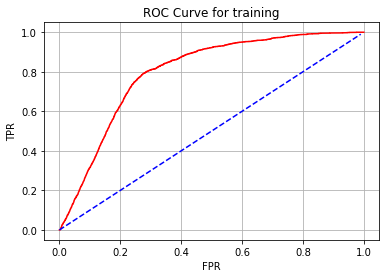

In [39]:
#Curva ROC y AUC utilizando metrics.roc_curve para desempeño
fpr, tpr, _=roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

### Capacidad de predicción

In [33]:
confusion_matrix(y_validation, y_val_pred)

array([[12916,  6346],
       [   83,   467]], dtype=int64)

In [34]:
print(classification_report(y_validation,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80     19262
         1.0       0.07      0.85      0.13       550

    accuracy                           0.68     19812
   macro avg       0.53      0.76      0.46     19812
weighted avg       0.97      0.68      0.78     19812



Text(0.7, 0.1, 'AUC=0.8052%')

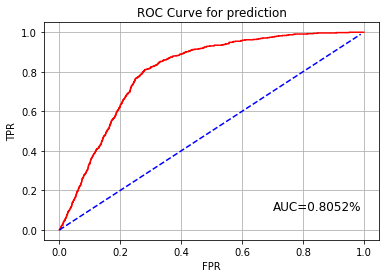

In [37]:
#Curva ROC y AUC utilizando metrics.roc_curve
fpr, sensitivity, _=metrics.roc_curve(y_validation,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [44]:
model1=model.fit(x1,y)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [45]:
y_pred=model1.predict_proba(x_map)[:,1]

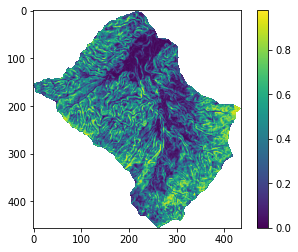

In [47]:
#mascara para crear el mapa de la cuenca
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/slope_rad')
pendiente = file.GetRasterBand(1)
pendiente = pendiente.ReadAsArray()

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente==-3.4028234663852886e+38,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

## Curva ROC manual

A continuación se presenta como se puede evaluar el modelo a traves de la curva ROC

In [ ]:
#construcción de la Curva ROC
S=[] #Sensitivity
E=[] #Specificity
probs_df['predict']=np.where(probs_df[0]>=0.09,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.08,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.07,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.06,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.05,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.04,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.03,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.02,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.01,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.009,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

#Curva ROC
plt.plot(E,S,marker='o')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

Finalmente se obtiene el mapa de susceptibilidad para toda la cuenca y se genera el mapa de salida en tiff

Elaborado por: EDIER V. ARISTIZÁBAL G.